In [2]:
import numpy as np
import matplotlib.pyplot as plt

#[bath temp [c], shape temp [c], time[s]]

brassData = np.genfromtxt('4650TransientConductionBrass.dat',
                     skip_header=0,
                     skip_footer=1,
                     names=True,
                     dtype=None,
                     delimiter='\t')

alumData = np.genfromtxt('4650TransientConductionAluminum.dat',
                     skip_header=0,
                     skip_footer=1,
                     names=True,
                     dtype=None,
                     delimiter='\t')

t0_brass = 8.25
t0_alum = 6.5
dt = 0.25
brassData = np.delete(brassData, np.arange(0, t0_brass/dt, 1, dtype=int))
alumData = np.delete(alumData, np.arange(0,t0_alum/dt, 1, dtype=int))

Tinf_b = np.zeros(len(brassData))
Tbrass = np.zeros(len(brassData))
tBrass = np.zeros(len(brassData))

Tinf_a = np.zeros(len(alumData))
Talum = np.zeros(len(alumData))
tAlum = np.zeros(len(alumData))

for i in range(len(brassData)):
    tBrass[i] = brassData[i][2] - t0_brass
    Tinf_b[i] = brassData[i][0]
    Tbrass[i] = brassData[i][1]
for i in range(len(alumData)):
    tAlum[i] = alumData[i][2] - t0_alum
    Tinf_a[i] = alumData[i][0]
    Talum[i] = alumData[i][1]
    
Ti_brass = brassData[0][1]
Ti_alum = alumData[0][1]
Tinf_brass = np.mean(Tinf_b)
Tinf_alum = np.mean(Tinf_a)
thetaBrass = (Tbrass-Tinf_brass)/(Ti_brass-Tinf_brass)
thetaAlum = (Talum-Tinf_alum)/(Ti_alum-Tinf_alum)

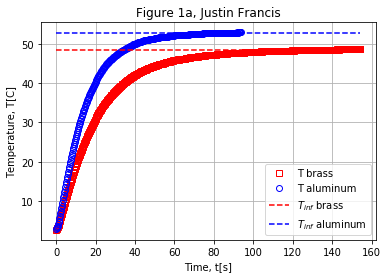

In [3]:
#fig 1a
plt.figure(1)
plt.plot(tBrass, Tbrass, 'sr', fillstyle='none', label='T brass')
plt.plot(tAlum, Talum, 'ob', fillstyle='none', label='T aluminum')
plt.plot([min(tBrass), max(tBrass)], [Tinf_brass, Tinf_brass], '--r', label='$T_{inf}$ brass')
plt.plot([min(tBrass), max(tBrass)], [Tinf_alum, Tinf_alum], '--b', label='$T_{inf}$ aluminum')
plt.title('Figure 1a, Justin Francis')
plt.ylabel('Temperature, T[C]')
plt.xlabel('Time, t[s]')
plt.legend()
plt.grid()
plt.savefig('Fig1a.png', dpi=800)
plt.show()

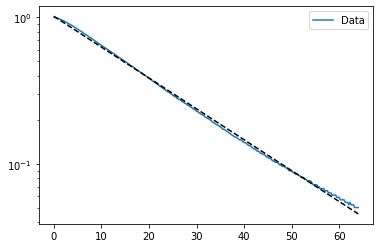

13.198435239213714
20.612827136182467
0.04742045623045579
0.09918534206572788
133.57918583780497
158.60254659435725
0.2849203326948552
0.32137991437689495


In [160]:
#lumped cap method

indB = np.where(thetaBrass>=0.05) #indices of data to use in curvefit
t_dataB=tBrass[indB] #time data to use in curve fit
theta_dataB=thetaBrass[indB] #theta data to use incurve fit

indA = np.where(thetaAlum>=0.05) #indices of data to use in curvefit
t_dataA=tAlum[indA] #time data to use in curve fit
theta_dataA=thetaAlum[indA] #theta data to use incurve fit

plt.figure(2)
plt.semilogy(t_dataB, theta_dataB, label='Data')
p = np.polyfit(t_dataB, np.log(theta_dataB), 1)
plt.semilogy(t_dataB, np.exp(p[0] * t_dataB + p[1]), 'k--')
plt.legend()
plt.show()

yB=np.log(theta_dataB)
mB=p[0]
bB=p[1]
tau_LCB=-1/mB
NB=len(yB)

err_dataB=yB-(mB*t_dataB+bB) #fit errors
s2B=np.sum(np.square(err_dataB))/(NB-2) #mean squared error
sum_ti2B=np.sum(np.square(t_dataB)) #sum of squared time data
sum2_tiB=np.sum(t_dataB)**2 #squared sum of time data
sigma_mB=np.sqrt(NB*s2B/(NB*sum_ti2B-sum2_tiB)) #error in m
sigma_tauB=1/mB**2*sigma_mB #error in tau_LC\

p = np.polyfit(t_dataA, np.log(theta_dataA), 1)
yA=np.log(theta_dataA)
mA=p[0]
bA=p[1]
tau_LCA=-1/mA
NA=len(yA)

err_dataA=yA-(mA*t_dataA+bA) #fit errors
s2A=np.sum(np.square(err_dataA))/(NA-2) #mean squared error
sum_ti2A=np.sum(np.square(t_dataA)) #sum of squared time data
sum2_tiA=np.sum(t_dataA)**2 #squared sum of time data
sigma_mA=np.sqrt(NA*s2A/(NA*sum_ti2A-sum2_tiA)) #error in m
sigma_tauA=1/mA**2*sigma_mA #error in tau_LC\

r0 = 0.0254 #m
k_brass = 116.0 #W/mK
rho_brass = 8500 #kg/m3
c_brass = 382.6 #J/kgK
alpha_brass = k_brass/(rho_brass*c_brass)

k_alum = 121.4 #W/mK
rho_alum = 2760 #kg/m3
c_alum = 895.8 #J/kgK
alpha_alum = k_alum/(rho_alum*c_alum)

print(tau_LCA)
print(tau_LCB)
print(2*sigma_tauA)
print(2*sigma_tauB)
print((rho_brass*V*c_brass)/(tau_LCB*A))
print((rho_alum*V*c_alum)/(tau_LCA*A))
print(((rho_alum*V*c_alum)/(tau_LCA**2*A)) * sigma_tauA)
print(((rho_brass*V*c_brass)/(tau_LCB**2*A)) * sigma_tauB)

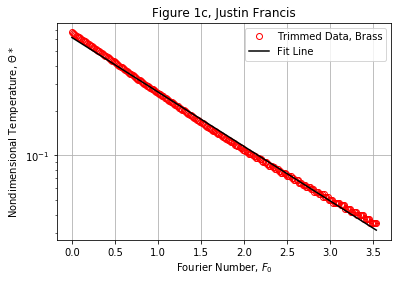

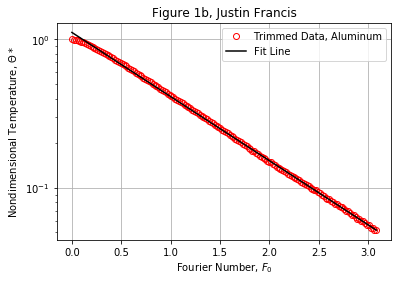

In [186]:
#fig 2b
F0_brass = (alpha_brass * t_dataB)/(r0**2)
F0_alum = (alpha_alum * t_dataA)/(r0**2)

plt.figure(3)
plt.semilogy(F0_brass, theta_dataB, 'ro', fillstyle='none', label='Trimmed Data, Brass')
p = np.polyfit(F0_brass, np.log(theta_dataB), 1)
plt.semilogy(F0_brass, np.exp(p[0] * F0_brass + p[1]), 'k', label='Fit Line')
plt.title('Figure 1c, Justin Francis')
plt.ylabel('Nondimensional Temperature, $\Theta*$')
plt.xlabel('Fourier Number, $F_0$')
plt.legend()
plt.grid()
plt.savefig('Fig1c.png', dpi=800)
plt.show()

tauLC_brass = -1/p[0]

plt.figure(4)
plt.semilogy(F0_alum, theta_dataA, 'ro', fillstyle='none', label='Trimmed Data, Aluminum')
p = np.polyfit(F0_alum, np.log(theta_dataA), 1)
plt.semilogy(F0_alum, np.exp(p[0] * F0_alum + p[1]), 'k', label='Fit Line')
plt.title('Figure 1b, Justin Francis')
plt.ylabel('Nondimensional Temperature, $\Theta*$')
plt.xlabel('Fourier Number, $F_0$')
plt.legend()
plt.grid()
plt.savefig('Fig1b.png', dpi=800)
plt.show()


tauLC_alum = -1/p[0]

In [150]:
V = .4/3 * np.pi * r0**3#m3
A = 4*np.pi*r0**2 #m2
hLC_brass = (rho_brass*V*c_brass)/(tauLC_brass*A)
hLC_alum = (rho_alum*V*c_alum)/(tauLC_alum*A)
Bi_brass = (hLC_brass*r0)/k_brass
Bi_alum = (hLC_alum*r0)/k_alum
print('LUMPED CAP METH:')
print('tab b:', tauLC_brass)
print('tau a: ', tauLC_alum)
print('Bi_brass: ', Bi_brass)
print('Bi_alum', Bi_alum)
print('hLC alum: ', hLC_alum)
print('hLC brass: ', hLC_brass)

LUMPED CAP METH:
tab b: 1.0045083683889944
tau a:  1.0045083683889944
Bi_brass:  0.60020349715863
Bi_alum 0.43600761340105065
hLC alum:  2083.9104042081713
hLC brass:  2741.0868374173656


In [184]:
#find appropriate radius to use LC method
rB = 0.1*k_brass/(hLC_brass)
rA = 0.1*k_alum/(hLC_alum)
print(rA)
print(rB)

0.005825586347419225
0.004231898034623904


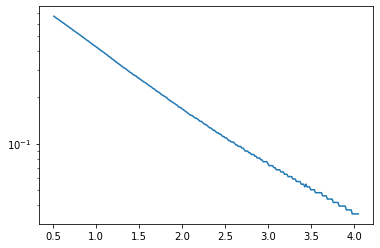

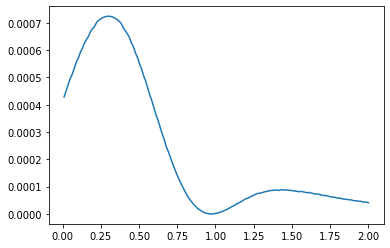

18.615771066352572
errZetaB 0.246
errZetaA 0.183
errtauESB 0.9702005583391713
errtauESA 0.4833234358137831


In [163]:
#analytical soln brass
F0_brass=tBrass*alpha_brass/r0**2 #Fourier number for data set
indB_F0=np.where(F0_brass>=0.5) #indices of data to use in curve fit
F0_dataB=F0_brass[indB_F0] #Fo data to use in curve fit
theta_dataB=thetaBrass[indB_F0] #theta data to use in curve fit
indB = np.where(thetaBrass>=0.05)
F0_dataB=F0_dataB[indB] #Fo data to use in curve fit
theta_dataB=theta_dataB[indB] #theta data to use in curve fit
NB=len(theta_dataB) #number of data points in curve fit

plt.figure(98)
plt.semilogy(F0_dataB, theta_dataB)
plt.show()

zeta1B=np.linspace(0.01,2,150) #parameter values
s2B=np.zeros(len(zeta1B)) #initialize s2 array

for k in range(len(zeta1B)): #(k=1:length(zeta1))
    z=zeta1B[k] #current value of zeta1
    theta_modelB=(4*(np.sin(z)-z*np.cos(z)))/(2*z-np.sin(2*z))*np.exp(-z**2*F0_dataB[k]) #theta based on model
    errB=theta_dataB[k]-theta_modelB #curve fit error
    s2B[k]=np.sum(errB**2)/(NB-1) #sum of squared error

i_minB = np.argmin(s2B) #find minimum s2 value
plt.figure(99)
plt.plot(zeta1B, s2B)
plt.show()

zeta1B_opt=zeta1B[i_minB] #best-fit zeta1 value
tauES_brass = r0**2/(alpha_brass*zeta1B_opt)

print(tauES_brass)
#from Matlab
print('errZetaB', 0.246)
print('errZetaA', 0.183)
print('errtauESB', ((2*r0**2)/(alpha_brass*zeta1B_opt**3))*0.0246)
print('errtauESA', ((2*r0**2)/(alpha_alum*zeta1A_opt**3))*0.0183)



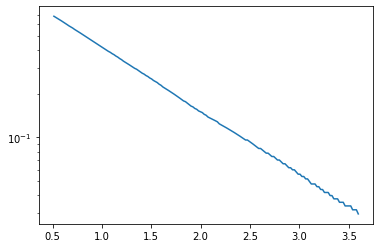

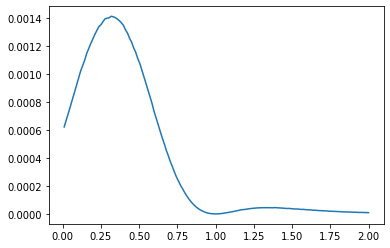

13.161281577490618


In [135]:
#anal soln alum
F0_alum=tAlum*alpha_alum/r0**2 #Fourier number for data set
indA_F0=np.where(F0_alum>=0.5) #indices of data to use in curve fit
F0_dataA=F0_alum[indA_F0] #Fo data to use in curve fit
theta_dataA=thetaAlum[indA_F0] #theta data to use in curve fit
indA = np.where(thetaAlum>=0.05)
F0_dataA=F0_dataA[indA] #Fo data to use in curve fit
theta_dataA=theta_dataA[indA] #theta data to use in curve fit
NA=len(theta_dataA) #number of data points in curve fit

plt.figure(96)
plt.semilogy(F0_dataA, theta_dataA)
plt.show()

zeta1A=np.linspace(0.01,2,150) #parameter values
s2A=np.zeros(len(zeta1A)) #initialize s2 array

for k in range(len(zeta1A)): #(k=1:length(zeta1))
    z=zeta1A[k] #current value of zeta1
    theta_modelA=(4*(np.sin(z)-z*np.cos(z)))/(2*z-np.sin(2*z))*np.exp(-z**2*F0_dataA[k]) #theta based on model
    errA=theta_dataA[k]-theta_modelA #curve fit error
    s2A[k]=np.sum(errA**2)/(NA-1) #sum of squared error

i_minA = np.argmin(s2A) #find minimum s2 value
plt.figure(97)
plt.plot(zeta1A, s2A)
plt.show()

zeta1A_opt=zeta1A[i_minA] #best-fit zeta1 value
tauES_alum = r0**2/(alpha_alum*zeta1A_opt)
print(tauES_alum)

In [172]:
# anal soln
Bi_alum = 1-zeta1A_opt*np.arctan(zeta1A_opt)
Bi_brass = 1-zeta1B_opt*np.arctan(zeta1B_opt)
print('Bi alum:', Bi_alum)
print('Bi brass:', Bi_brass)
hES_alum = k_alum/r0 * Bi_alum
hES_brass = k_brass/r0 * Bi_brass
print('hES alum:', k_alum/r0 * Bi_alum)
print('hES brass:', k_brass/r0 * Bi_brass)

Bi alum: 0.2167578403453675
Bi brass: 0.25088798598739825
hES alum: 1036.0000715719534
hES brass: 1145.787652540874


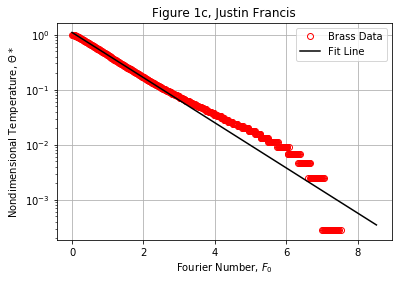

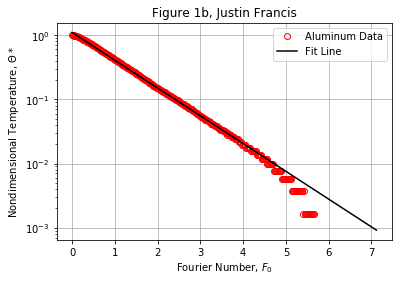

In [185]:
theta_starB = (4*(np.sin(zeta1B_opt)-zeta1B_opt*np.cos(zeta1B_opt)))/(2*zeta1B_opt-np.sin(2*zeta1B_opt))*np.exp(-zeta1B_opt**2*F0_brass)
theta_starA = (4*(np.sin(zeta1A_opt)-zeta1A_opt*np.cos(zeta1A_opt)))/(2*zeta1A_opt-np.sin(2*zeta1A_opt))*np.exp(-zeta1A_opt**2*F0_alum)


plt.figure(30)
plt.semilogy(F0_brass, thetaBrass, 'ro', fillstyle='none', label='Brass Data')
plt.semilogy(F0_brass, theta_starB, 'k', label='Fit Line')
plt.title('Figure 1c, Justin Francis')
plt.ylabel('Nondimensional Temperature, $\Theta*$')
plt.xlabel('Fourier Number, $F_0$')
plt.legend()
plt.grid()
plt.savefig('Fig1c1.png', dpi=800)
plt.show()


tauLC_brass = -1/p[0]

plt.figure(40)
plt.semilogy(F0_alum, thetaAlum, 'ro', fillstyle='none', label='Aluminum Data')
plt.semilogy(F0_alum, theta_starA, 'k', label='Fit Line')
plt.title('Figure 1b, Justin Francis')
plt.ylabel('Nondimensional Temperature, $\Theta*$')
plt.xlabel('Fourier Number, $F_0$')
plt.legend()
plt.grid()
plt.savefig('Fig1b1.png', dpi=800)
plt.show()


In [170]:
#total heat transfer
QB = (rho_brass*V*c_brass)*thetaBrass*(1-np.exp(-tBrass/tauES_brass))
QA = (rho_alum*V*c_alum)*thetaAlum*(1-np.exp(-tAlum/tauES_alum))

print(np.trapz(tAlum, QA))
print(np.trapz(tBrass, QB))
print(5.8e6)

-133.3557500438351
-269.8528760986388
5800000.0


In [174]:
#heat transfer coeff err
eH = np.abs(hES_brass - hES_alum)/(.5*(hES_brass+hES_alum))*100
print(eH)

10.06400208008899


In [183]:
#goodness of fit
yi = np.log(theta_starB)
St = np.sum(yi-np.mean(yB))
Sr = np.sum((yi-mB*tBrass-bB)**2)
print((St-Sr)/St)

yi = np.log(theta_starA)
St = np.sum(yi-np.mean(yA))
Sr = np.sum((yi-mA*tAlum-bA)**2)
print((St-Sr)/St)

0.9709371508276288
0.9998958595936964
